# Chutes & Ladders

This is a fun evening exploration to teach myself how to code
Python by asking the question "What does the distribution of
games of Chutes & Ladders look like by number of spins to win?"

If you're new to Jupyter or Python you might find this interesting.

- David E. Weekly <david@weekly.org>

In [15]:
# We'll be lazy and code both chutes and ladders as "portals",
# first specifying the square FROM which the portal will go and
# then the square TO which the portal will take you. This allows
# both forward and backward movement. This set of coded portals
# maps the Chutes & Ladders game.

portals = (
        (1,38),
        (4,14),
        (9,31),
        (16,6),
        (21,42),
        (28,84),
        (36,44),
        (47,26),
        (49,11),
        (56,53),
        (51,67),
        (62,19),
        (64,60),
        (71,91),
        (80,100),
        (87,24),
        (93,73),
        (96,75),
        (98,78),
    )

# Very simple linear lookup to see if the given square has a
# portal on it and if so to where. Returns False if no portal.
def portalToWhere(fromSquare):
    for p in portals:
        if(p[0] == fromSquare):
            return p[1]
    return False

# Plays a game of Chutes & Ladders, returns # spins to win
# If printGame is true, will print details of the game.
import random
def playGame(printGame):
    pos = 0
    spins = 0
    while (True):
        spin = random.randint(1,6)
        spins = spins + 1
        if(printGame): print ("you spun a ", spin)
        if(pos + spin > 100):
            if(printGame): print ("oh no,  you can't go past 100")
        else:
            pos += spin
            if(printGame): print ("after roll you landed on ", pos)
        portalDest = portalToWhere(pos)
        if(portalDest):
            if(portalDest<pos):
                if(printGame): print("oh no, a chute to",portalDest)
            if(portalDest>pos):
                if(printGame): print("oh yay, a ladder to",portalDest)
            pos=portalDest
        if(pos == 100):
            break
    if(printGame): print ("you won in ",spins,"spins!")
    return spins

# Now we're going to play a whole bunch of games to get a distribution.
print("Playing games...")
g = []
for game in range(10000):
    g.append(playGame(False))
print("10,000 games completed.")

Playing games...
10,000 games completed.


In [19]:
print "Fastest game is in",min(g),"spins."
print "Slowest game is in",max(g),"spins."

Fastest game is in 7 spins
Slowest game is in 244 spins


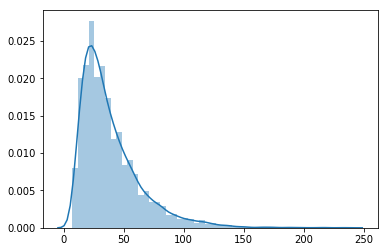

In [14]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(g)